In [38]:
import demo

import glob
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [8]:
d = [0.13136332616042,
 0.06045141476471775,
 0.041178185500892577,
 0.033742004736444356,
 0.03157207117239225,
 0.02976073872680868,
 0.03031915376073083,
 0.029195345364379295]

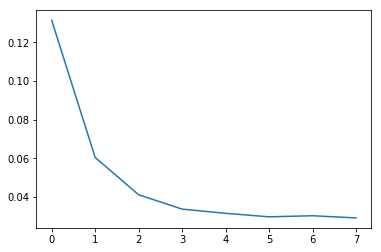

In [57]:
# training loss per epoch
plt.plot(d)

In [10]:
dataset = demo.BoatDataset(demo.LABELS_FILE, demo.SOUNDS_FILE, test_set=True)
input_size = dataset[0][0].size(1)
BATCH_SIZE = 4

In [37]:
def evaluate(input_size, state_file, dataset, n=None):
    net = demo.BoatNet(input_size)
    net.train(False)
    dataloader = demo.DataLoader(
        dataset,
        batch_size=BATCH_SIZE,
        num_workers=0,
        shuffle=True
    )
    
    # load weights
    state_dict = torch.load(state_file)
    net.load_state_dict(state_dict)

    # results
    all_y = []
    all_y_pred = []
    for i, (x, y) in enumerate(dataloader):

        # forward pass
        batch_size = x.size(0)  # batch is first dimension
        hidden = net.init_hidden(batch=batch_size)  # reset hidden layer!
        hidden.volatile=True  # set to volatile since don't care about gradient        
        y_pred = net(Variable(x, volatile=True), hidden).data
        y_pred = y_pred.numpy().argmax(axis=1)
        all_y.extend(y.tolist())
        all_y_pred.extend(y_pred.tolist())
        
        if i % 5 == 1:
            acc = np.sum(np.array(all_y) == all_y_pred) / float(len(all_y))
            print "\r  evaluating @ %d accuracy: %.2f" % (i, acc * 100),
        
        if n and i == n:
            break

    acc = np.sum(np.array(all_y) == all_y_pred) / float(len(all_y))
    print
    return net, all_y, all_y_pred, acc

In [33]:
net, all_y, all_y_pred, acc = evaluate(input_size, "model_00_000000499.state", dataset, n=100)

Evaluating @ 96 accuracy: 85.31 


In [54]:
# state_files = sorted(glob.glob("model_0?_000028453.state"))
state_files = sorted(glob.glob("model_0?_000000499.state"))
state_files

['model_00_000000499.state',
 'model_01_000000499.state',
 'model_02_000000499.state',
 'model_03_000000499.state',
 'model_04_000000499.state',
 'model_05_000000499.state',
 'model_06_000000499.state',
 'model_07_000000499.state',
 'model_08_000000499.state']

In [55]:
results = []
n = 100
with open("eval.log", "w") as f:
    for state_file in state_files:
        print "Evaluating", state_file
        net, all_y, all_y_pred, acc = evaluate(input_size, state_file, dataset, n=n)
        results.append((state_file, all_y, all_y_pred, acc))
        print "  %s: %.2f" % (state_file, acc * 100)
        print >> f, "%s,%.5f" % (state_file, acc)
        f.flush()

Evaluating model_00_000000499.state
  evaluating @ 6 accuracy: 89.29 
  model_00_000000499.state: 90.91
Evaluating model_01_000000499.state
  evaluating @ 6 accuracy: 96.430 
  model_01_000000499.state: 97.73
Evaluating model_02_000000499.state
  evaluating @ 6 accuracy: 89.290 
  model_02_000000499.state: 90.91
Evaluating model_03_000000499.state
  evaluating @ 6 accuracy: 96.430 
  model_03_000000499.state: 97.73
Evaluating model_04_000000499.state
  evaluating @ 6 accuracy: 100.00 
  model_04_000000499.state: 100.00
Evaluating model_05_000000499.state
  evaluating @ 6 accuracy: 100.00 
  model_05_000000499.state: 100.00
Evaluating model_06_000000499.state
  evaluating @ 6 accuracy: 100.00 
  model_06_000000499.state: 100.00
Evaluating model_07_000000499.state
  evaluating @ 6 accuracy: 96.430 
  model_07_000000499.state: 95.45
Evaluating model_08_000000499.state
  evaluating @ 6 accuracy: 100.00 
  model_08_000000499.state: 97.73


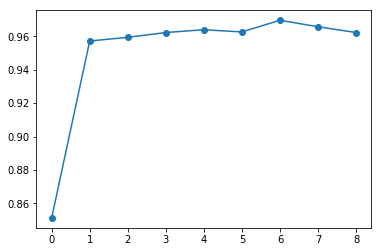

In [59]:
with open("eval.log") as f:
    accs = [float(line.strip().split(",")[-1]) for line in f]
plt.plot(accs, "-o")